In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
DF=pd.read_csv('advertising.csv')

In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [8]:
DF.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [9]:
DF.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


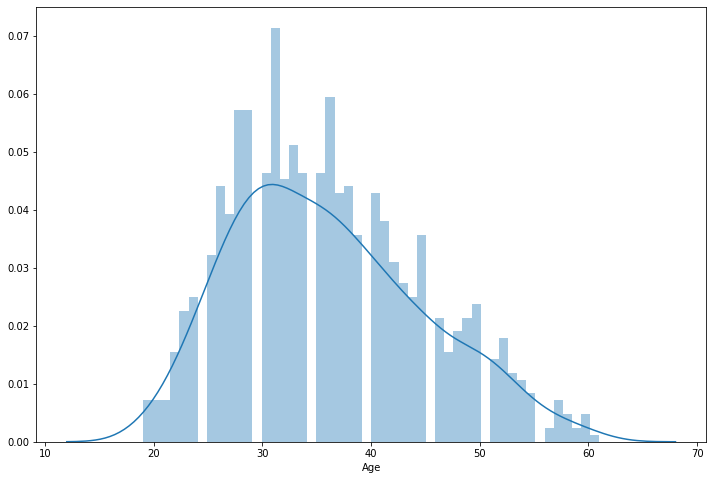

In [47]:
plt.figure(figsize=(12,8))
sns.distplot(DF['Age'],bins=50,vertical=False,)


<Figure size 864x576 with 0 Axes>

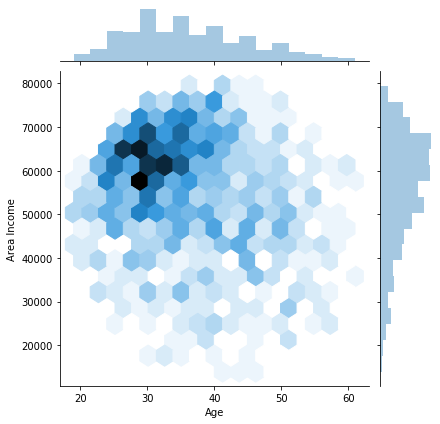

In [55]:
#we have to check whether they will click on the add or not based on the features of the user
plt.figure(figsize=(12,8))
sns.jointplot(x='Age',y='Area Income',data=DF,kind='hex')
#we can see the relationship between age and areaof income 

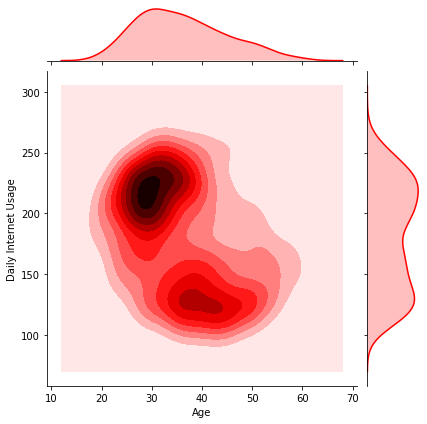

In [57]:
sns.jointplot(x='Age',y='Daily Internet Usage',data=DF,kind='kde',color='red')
#what age of people are using the internet most

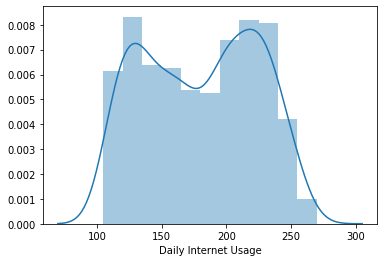

In [59]:
sns.distplot(DF['Daily Internet Usage'])  # not normally distributed highest internet usage is for age 30 approx

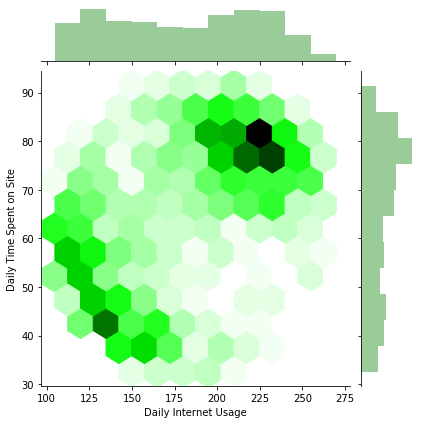

In [66]:
sns.jointplot(x='Daily Internet Usage',y='Daily Time Spent on Site',data=DF,kind='hex',color='Green')

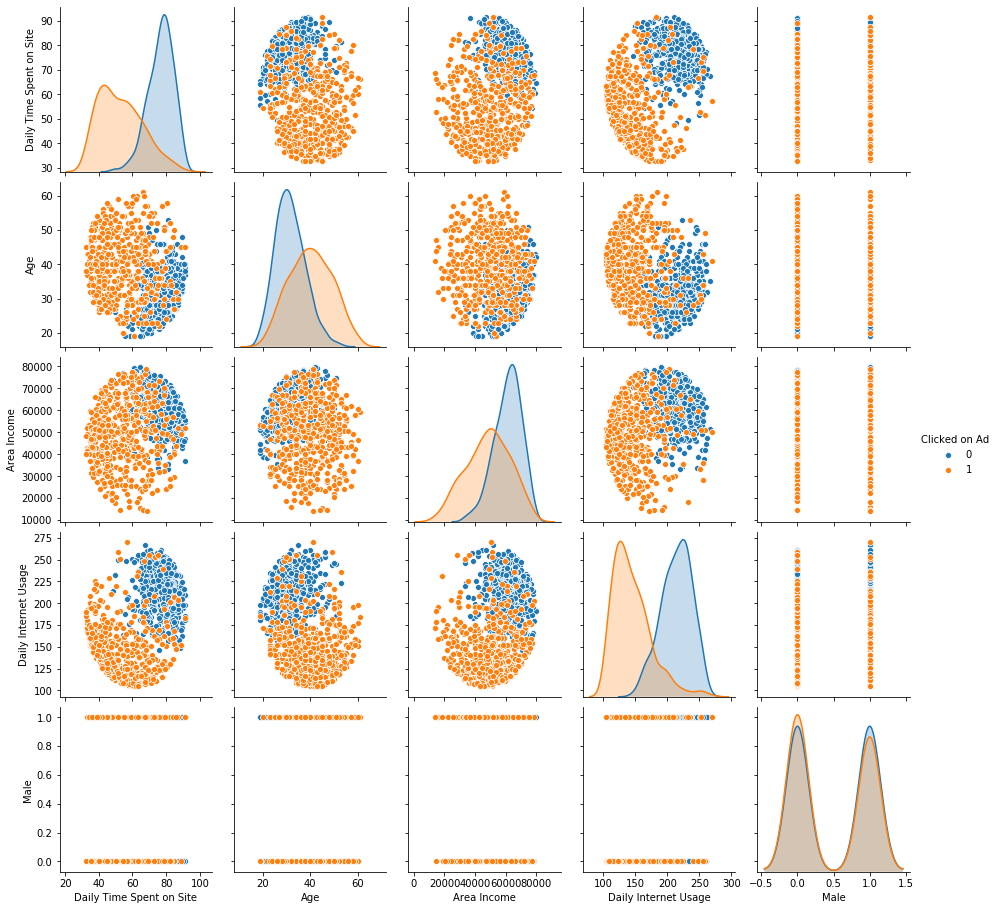

In [70]:
sns.pairplot(DF,hue='Clicked on Ad')

In [71]:
#train our model now
#sigmoidal function is used for logistic regression here we will use logistic regression model
from sklearn.model_selection import train_test_split

In [72]:
from sklearn.linear_model import LogisticRegression

In [105]:
logmodel=LogisticRegression(C=1.5)  # C parameter can be used to tune the accuracy

In [106]:
X_train, X_test, y_train, y_test=train_test_split(DF[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']],DF['Clicked on Ad'])

In [107]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
pred=logmodel.predict(X_test)

In [109]:
#now we use a confusion matrix to eavaluate or model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [110]:
confusion_matrix(pred,y_test)

array([[123,  19],
       [ 10,  98]])

In [111]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       142
           1       0.84      0.91      0.87       108

    accuracy                           0.88       250
   macro avg       0.88      0.89      0.88       250
weighted avg       0.89      0.88      0.88       250



In [112]:
DF['Clicked on Ad'].value_counts() # there is no imbalance in the classification class

1    500
0    500
Name: Clicked on Ad, dtype: int64